In [1]:
import pandas as pd

# Column names as defined by NASA
columns = ['engine_id', 'cycle'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

In [2]:
test_df = pd.read_csv(
    "/mnt/f/Zaalima Internship/Zaalima Project/factoryguard-ai/data/raw/test_FD001.txt",
    sep=' ',
    header=None
)

test_df=test_df.dropna(axis=1,how="all")

test_df.columns=columns

test_df

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [3]:
max_cycles=test_df.groupby("engine_id")["cycle"].max().reset_index().rename({"cycle":"max_cycle"},axis="columns")
max_cycles

,engine_id,max_cycle
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [4]:
test_df=test_df.merge(max_cycles,on="engine_id")
test_df["RUL"]=test_df["max_cycle"]-test_df["cycle"]
test_df["label_24"]=(test_df["RUL"]<=24).astype(int)

In [5]:
test_df

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,label_24
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,30,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,29,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,28,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,27,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,4,1
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,3,1
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,2,1
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,1,1


In [6]:
import joblib
features=joblib.load("/mnt/f/Zaalima Internship/Zaalima Project/factoryguard-ai/output/features.pkl")
model=joblib.load("/mnt/f/Zaalima Internship/Zaalima Project/factoryguard-ai/output/final_model.pkl")


In [7]:
features

['sensor_2_mean_6',
 'sensor_4_mean_6',
 'sensor_7_mean_6',
 'sensor_11_mean_6',
 'sensor_15_mean_6',
 'sensor_21_mean_6',
 'sensor_3_mean_12',
 'sensor_15_mean_12',
 'sensor_17_mean_12',
 'sensor_15_ema_12',
 'sensor_17_ema_12',
 'sensor_21_ema_12']

In [8]:
mean_window = {
    6: ["sensor_2", "sensor_4", "sensor_7", "sensor_11", "sensor_15", "sensor_21"],
    12: ["sensor_3", "sensor_15", "sensor_17"]
}

ema_window = {
    12: ["sensor_15", "sensor_17", "sensor_21"]
}

In [9]:
mean_window

{6: ['sensor_2',
  'sensor_4',
  'sensor_7',
  'sensor_11',
  'sensor_15',
  'sensor_21'],
 12: ['sensor_3', 'sensor_15', 'sensor_17']}

In [10]:
ema_window

{12: ['sensor_15', 'sensor_17', 'sensor_21']}

In [11]:
for w,name in mean_window.items():
    for n in name:
        test_df[f"{n}_mean_{w}"]=test_df.groupby("engine_id")[n].transform(lambda test_df: test_df.rolling(window=w).mean())

for w,name in ema_window.items():
    for n in name:
        test_df[f"{n}_ema_12"]=test_df.groupby("engine_id")[n].transform(lambda test_df: test_df.ewm(span=12).mean())


In [12]:
test_df

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_7_mean_6,sensor_11_mean_6,sensor_15_mean_6,sensor_21_mean_6,sensor_3_mean_12,sensor_15_mean_12,sensor_17_mean_12,sensor_15_ema_12,sensor_17_ema_12,sensor_21_ema_12
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.405200,392.000000,23.373500
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.391713,392.541667,23.383304
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.412159,392.720554,23.396300
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.405701,392.177443,23.389166
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.404994,391.585839,23.395641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,553.361667,47.581667,8.456333,23.268200,1594.549167,8.456050,394.250000,8.454894,394.289014,23.270864
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,553.300000,47.590000,8.457817,23.261250,1594.578333,8.456458,394.333333,8.454325,394.398396,23.271823
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,553.208333,47.603333,8.454550,23.236250,1594.350000,8.456467,394.416667,8.454722,394.490951,23.261558
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,553.230000,47.603333,8.451783,23.243250,1594.584167,8.458858,394.500000,8.457241,394.569266,23.262842


In [13]:
test_df.dropna(inplace=True)
test_df

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_7_mean_6,sensor_11_mean_6,sensor_15_mean_6,sensor_21_mean_6,sensor_3_mean_12,sensor_15_mean_12,sensor_17_mean_12,sensor_15_ema_12,sensor_17_ema_12,sensor_21_ema_12
11,1,12,0.0026,0.0003,100.0,518.67,642.54,1587.43,1397.82,14.62,...,554.215000,47.255000,8.407933,23.382850,1585.195000,8.407983,391.583333,8.407329,391.366600,23.382876
12,1,13,-0.0056,0.0003,100.0,518.67,641.94,1589.09,1403.94,14.62,...,554.240000,47.261667,8.412133,23.378267,1585.511667,8.408933,391.583333,8.408939,391.476583,23.380241
13,1,14,0.0017,-0.0004,100.0,518.67,642.23,1583.16,1402.88,14.62,...,554.418333,47.266667,8.413467,23.400733,1585.070833,8.413017,391.500000,8.412406,391.565704,23.393344
14,1,15,-0.0003,-0.0003,100.0,518.67,642.50,1584.81,1398.79,14.62,...,554.361667,47.263333,8.410300,23.386583,1584.893333,8.410700,391.416667,8.413058,391.638456,23.388965
15,1,16,-0.0018,0.0003,100.0,518.67,642.32,1584.51,1407.76,14.62,...,554.285000,47.305000,8.413750,23.380983,1584.925833,8.413892,391.333333,8.415858,391.367688,23.382261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,553.361667,47.581667,8.456333,23.268200,1594.549167,8.456050,394.250000,8.454894,394.289014,23.270864
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,553.300000,47.590000,8.457817,23.261250,1594.578333,8.456458,394.333333,8.454325,394.398396,23.271823
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,553.208333,47.603333,8.454550,23.236250,1594.350000,8.456467,394.416667,8.454722,394.490951,23.261558
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,553.230000,47.603333,8.451783,23.243250,1594.584167,8.458858,394.500000,8.457241,394.569266,23.262842


In [14]:
x=test_df[features]
y=test_df["label_24"]

In [15]:
y.value_counts()

label_24
0    9503
1    2493
Name: count, dtype: int64

In [16]:
x.isna().sum()

sensor_2_mean_6      0
sensor_4_mean_6      0
sensor_7_mean_6      0
sensor_11_mean_6     0
sensor_15_mean_6     0
sensor_21_mean_6     0
sensor_3_mean_12     0
sensor_15_mean_12    0
sensor_17_mean_12    0
sensor_15_ema_12     0
sensor_17_ema_12     0
sensor_21_ema_12     0
dtype: int64

In [17]:
y_pred_proba=model.predict_proba(x)[:,1]
y_pred_proba

array([2.27956936e-05, 2.27956936e-05, 2.27956936e-05, ...,
       1.17891179e-01, 3.98465101e-01, 4.82686220e-01])

In [18]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      9503
           1       0.93      0.10      0.18      2493

    accuracy                           0.81     11996
   macro avg       0.87      0.55      0.54     11996
weighted avg       0.83      0.81      0.75     11996



In [20]:
test_df["risk_score"]=y_pred_proba

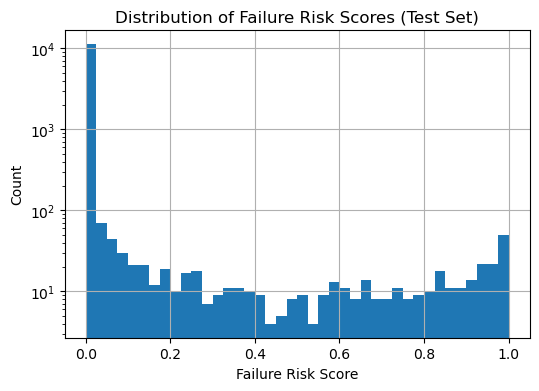

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(test_df["risk_score"], bins=40)
plt.xlabel("Failure Risk Score")
plt.ylabel("Count")
plt.yscale("log")
plt.title("Distribution of Failure Risk Scores (Test Set)")
plt.grid(True)
plt.show()

In [22]:
def categorize_risk(score):
    if score >= 0.85:
        return "CRITICAL"
    elif score >= 0.60:
        return "HIGH"
    elif score >= 0.30:
        return "MEDIUM"
    else:
        return "LOW"

In [23]:
test_df["risk_category"]=test_df["risk_score"].apply(categorize_risk)

In [24]:
test_df=test_df[features+["risk_category"]]
test_df

,sensor_2_mean_6,sensor_4_mean_6,sensor_7_mean_6,sensor_11_mean_6,sensor_15_mean_6,sensor_21_mean_6,sensor_3_mean_12,sensor_15_mean_12,sensor_17_mean_12,sensor_15_ema_12,sensor_17_ema_12,sensor_21_ema_12,risk_category
11,642.196667,1403.050000,554.215000,47.255000,8.407933,23.382850,1585.195000,8.407983,391.583333,8.407329,391.366600,23.382876,LOW
12,642.168333,1402.900000,554.240000,47.261667,8.412133,23.378267,1585.511667,8.408933,391.583333,8.408939,391.476583,23.380241,LOW
13,642.116667,1403.231667,554.418333,47.266667,8.413467,23.400733,1585.070833,8.413017,391.500000,8.412406,391.565704,23.393344,LOW
14,642.220000,1400.983333,554.361667,47.263333,8.410300,23.386583,1584.893333,8.410700,391.416667,8.413058,391.638456,23.388965,LOW
15,642.261667,1402.503333,554.285000,47.305000,8.413750,23.380983,1584.925833,8.413892,391.333333,8.415858,391.367688,23.382261,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.091667,1416.930000,553.361667,47.581667,8.456333,23.268200,1594.549167,8.456050,394.250000,8.454894,394.289014,23.270864,LOW
13092,643.080000,1417.661667,553.300000,47.590000,8.457817,23.261250,1594.578333,8.456458,394.333333,8.454325,394.398396,23.271823,LOW
13093,643.161667,1415.251667,553.208333,47.603333,8.454550,23.236250,1594.350000,8.456467,394.416667,8.454722,394.490951,23.261558,LOW
13094,643.218333,1416.203333,553.230000,47.603333,8.451783,23.243250,1594.584167,8.458858,394.500000,8.457241,394.569266,23.262842,MEDIUM


In [35]:
row = test_df[test_df["risk_category"]=="LOW"].sample(1)
test_df.loc[row.index[0]].to_json()


'{"sensor_2_mean_6":642.6966666667,"sensor_4_mean_6":1408.3833333333,"sensor_7_mean_6":553.7683333333,"sensor_11_mean_6":47.5066666667,"sensor_15_mean_6":8.43315,"sensor_21_mean_6":23.33495,"sensor_3_mean_12":1590.0016666667,"sensor_15_mean_12":8.4326583333,"sensor_17_mean_12":392.6666666667,"sensor_15_ema_12":8.4334302301,"sensor_17_ema_12":392.8826179321,"sensor_21_ema_12":23.3262336787,"risk_category":"LOW"}'

In [36]:
row = test_df[test_df["risk_category"]=="MEDIUM"].sample(1)
test_df.loc[row.index[0]].to_json()


'{"sensor_2_mean_6":643.0033333333,"sensor_4_mean_6":1419.7333333333,"sensor_7_mean_6":552.6266666667,"sensor_11_mean_6":47.8066666667,"sensor_15_mean_6":8.4828,"sensor_21_mean_6":23.1709166667,"sensor_3_mean_12":1594.6716666667,"sensor_15_mean_12":8.4769416667,"sensor_17_mean_12":394.3333333333,"sensor_15_ema_12":8.4799644034,"sensor_17_ema_12":394.3329552484,"sensor_21_ema_12":23.179966116,"risk_category":"MEDIUM"}'

In [37]:
row = test_df[test_df["risk_category"]=="HIGH"].sample(1)
test_df.loc[row.index[0]].to_json()


'{"sensor_2_mean_6":643.0133333333,"sensor_4_mean_6":1414.595,"sensor_7_mean_6":552.345,"sensor_11_mean_6":47.7433333333,"sensor_15_mean_6":8.4746666667,"sensor_21_mean_6":23.2003333333,"sensor_3_mean_12":1594.7608333333,"sensor_15_mean_12":8.4610916667,"sensor_17_mean_12":394.4166666667,"sensor_15_ema_12":8.4649009988,"sensor_17_ema_12":394.3972136228,"sensor_21_ema_12":23.2184437485,"risk_category":"HIGH"}'

In [38]:
row = test_df[test_df["risk_category"]=="CRITICAL"].sample(1)
test_df.loc[row.index[0]].to_json()


'{"sensor_2_mean_6":643.1716666667,"sensor_4_mean_6":1420.2483333333,"sensor_7_mean_6":552.1033333333,"sensor_11_mean_6":47.95,"sensor_15_mean_6":8.4816,"sensor_21_mean_6":23.15875,"sensor_3_mean_12":1596.87,"sensor_15_mean_12":8.47825,"sensor_17_mean_12":394.5833333333,"sensor_15_ema_12":8.4829457657,"sensor_17_ema_12":394.6213670979,"sensor_21_ema_12":23.1630804297,"risk_category":"CRITICAL"}'